In [1]:
!python --version

Python 3.11.7


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

# Change setting in pandas to display all columns
pd.options.display.max_columns = None

### Data Import

In [5]:
# Import medical dataset
medicalDF =pd.read_csv(r"C:\Users\ashle\Desktop\MSDA WGU\Data Mining 2 -D212\task 1\dataset\medical_clean.csv")

### Data Exploration

In [7]:
medicalDF

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [9]:
medicalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [11]:
medicalDF[['Initial_days', 'Age']].describe()

,Initial_days,Age
count,10000.000000,10000.000000
mean,34.455299,53.511700
std,26.309341,20.638538
min,1.001981,18.000000
25%,7.896215,36.000000
50%,35.836244,53.000000
75%,61.161020,71.000000
max,71.981490,89.000000


### Data Cleaning

In [13]:
# Create a copy of the data frame for cleaning the data.
medicalClean = medicalDF.copy()

In [15]:
# Indentify duplicates 
duplicates = medicalClean[medicalClean.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []


In [17]:
# Identify null values in the dataframe.
missingValues = medicalClean.isnull().sum().sum()
print(missingValues)

0


In [19]:
# Identify and remove outliers using the z-score with a threshold set at 3 standard deviations from the mean 
# Select numeric columns to check for outliers
numeric_cols = medicalClean.select_dtypes(include=[np.number]).columns

# Calculate Z-scores
z_scores = zscore(medicalClean[numeric_cols])

# Set a Z-score threshold, 3 standard deviations from the mean
threshold = 3

# Identify rows where any column exceeds the threshold
outliers = z_scores.abs() > threshold

#Print a count of rows with outliers
rows_with_outliers = outliers.any(axis=1).sum()
print(f"Number of rows with outliers: {rows_with_outliers}")

# Remove the outliers
medicalClean_non_outliers = medicalClean[~outliers.any(axis=1)]

# Print the count of outliers removed for each column.
print(f"Removed {outliers.sum()} outliers.")

# Print the row count of the dataframe after removing outliers
print(medicalClean_non_outliers.shape)


Number of rows with outliers: 880
Removed CaseOrder               0
Zip                     0
Lat                   144
Lng                    98
Population            218
Children              202
Age                     0
Income                143
VitD_levels            24
Doc_visits              8
Full_meals_eaten       33
vitD_supp              70
Initial_days            0
TotalCharge             0
Additional_charges      0
Item1                  11
Item2                  12
Item3                  12
Item4                  12
Item5                  13
Item6                  10
Item7                  11
Item8                  12
dtype: int64 outliers.
(9120, 50)


In [21]:
# Assign a features variable with the features to use in the clustering
features = medicalClean_non_outliers[['Age', 'Initial_days']]
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
# Setting the scaled data to a pandas dataframe
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)

In [23]:
scaled_data

,Age,Initial_days
0,-0.026450,-0.903642
1,-0.123465,-0.731090
2,-0.026450,-1.124416
3,1.186229,-1.240518
4,-1.530172,-1.257989
...,...,...
9115,-1.384651,0.652418
9116,1.622793,1.302065
9117,-0.414507,1.358494
9118,-0.511522,1.100365


In [25]:
# Export cleaned data
scaled_data.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Data Mining 2 -D212\task 1\cleaned data\scaled_data.csv')

### Identify Optimal Number of Clusters

In [27]:
# Perform KMeans for 2 to 10 clusters
k_range = range(2, 11)
inertia_values = []  
silhouette_scores = []
# Fit K-Means for each number of clusters
for k in k_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=10, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data, cluster_labels)
    # Store the within-cluster sum of squares (WCSS)
    inertia_values.append(kmeans.inertia_) 
    # Store the silhouette score
    silhouette_scores.append(sil_score)


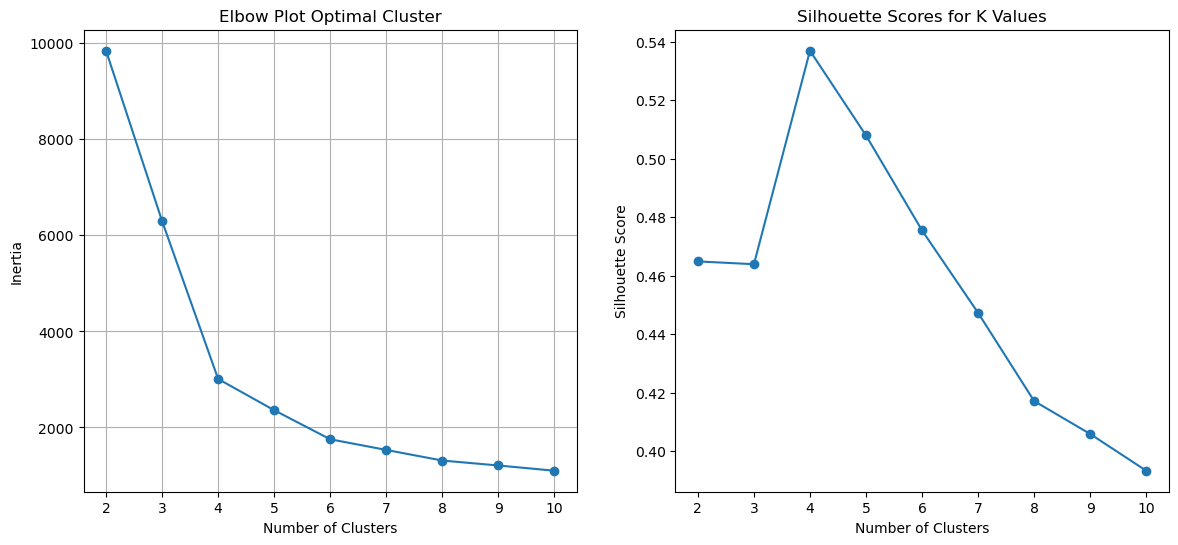

In [29]:
# Plot an elbow graph to identify the optimal cluster count where adding more clusters stops significantly improving the fit.
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Plot Optimal Cluster")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_range)

# Plot the silhouette scores to identify optimal cluster count.
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K Values')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

plt.show()

### Perform Final KMeans and Visualize

In [31]:
# Perform final k-means clustering with 4 clusters as identified through the elbow plot and silhouette plot above
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
# Fit the scaled data to the model
cluster_labels = kmeans_final.fit_predict(scaled_data)
# Save cluster labels to the original dataframe
medicalClean_non_outliers['Clusters'] = cluster_labels  

C:\Users\ashle\AppData\Local\Temp\ipykernel_11140\1984582720.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medicalClean_non_outliers['Clusters'] = cluster_labels


In [33]:
# Assign the centroid values for each cluster to a pandas dataframe
centroids = pd.DataFrame(kmeans_final.cluster_centers_, columns=['Age', 'Initial_days'])
centroids

,Age,Initial_days
0,-0.854628,0.964205
1,-0.874467,-0.958384
2,0.876690,0.961129
3,0.857856,-0.953492


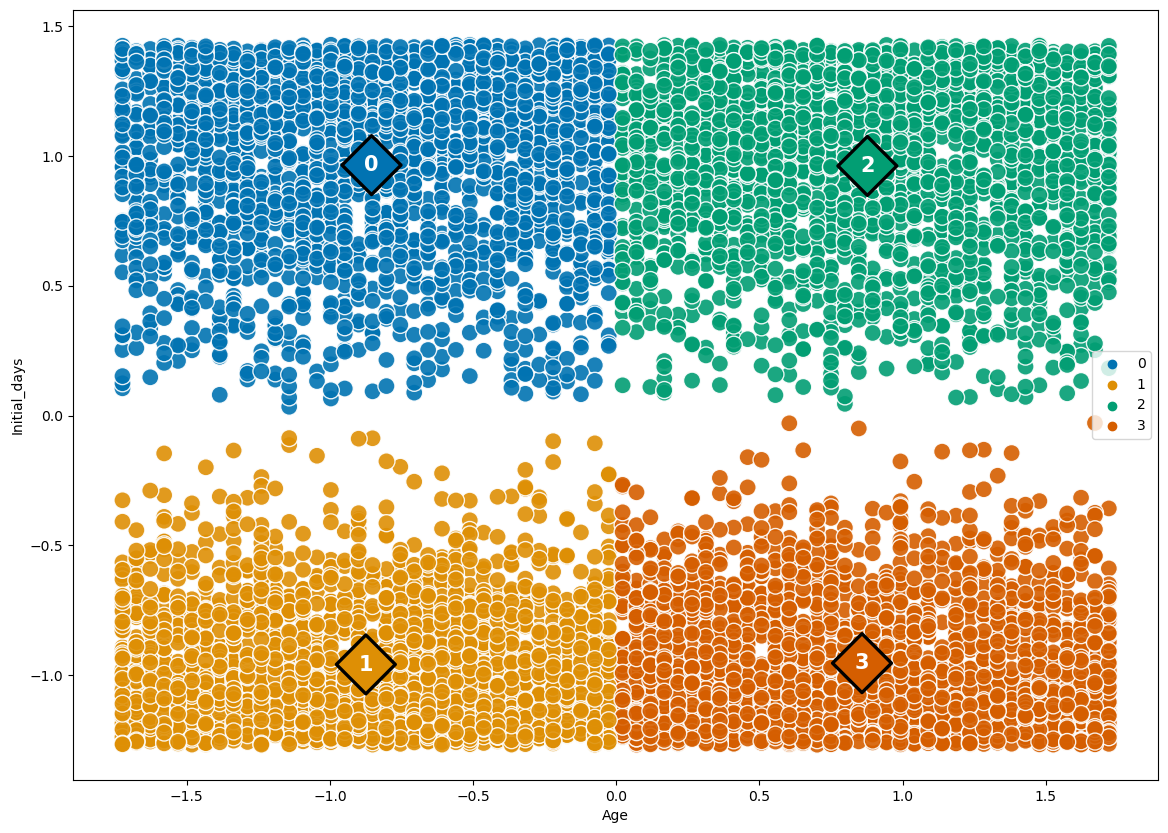

In [35]:
# Plot the clusters for visualization (Kamara)
plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=scaled_data,
                    x='Age',
                    y='Initial_days',
                    hue=kmeans_final.labels_,
                    palette='colorblind',
                    alpha=0.9,
                    s = 150,
                    legend = True)

# Mark the centroids for each cluster
ax = sns.scatterplot(data=centroids,
                    x='Age',
                    y='Initial_days',
                    hue=centroids.index,
                    palette='colorblind',
                    s = 900,
                    marker='D',
                    edgecolor='black',
                    legend = False)
# Loop through each centroid to print the cluster count on the centroid marker
for i in range(len(centroids)):
    plt.text(x=centroids.Age[i],
             y=centroids.Initial_days[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=15,
             weight='bold',
             color='white')


### Quality of Clusters

In [37]:
# Calculate the silhouette score for the final kmeans model
sil_score = silhouette_score(scaled_data, kmeans_final.labels_)
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.54
